概要：上节学习了矩阵的逆运算，这非常的重要；本节讨论矩阵的行列式。

1.矩阵乘法 - 旋转。

当做矩阵的点积运算时，如果第一个矩阵是一维的，那么结果是在一维矩阵上的投影；我们看看第一个矩阵是二维的情况：

In [4]:
from __future__ import division, print_function, unicode_literals

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()
    
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])

我们创建一个夹角为30度和120度的二维矩阵：

In [5]:
angle30 = 30 * np.pi / 180
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

我们看看V和P的点积：

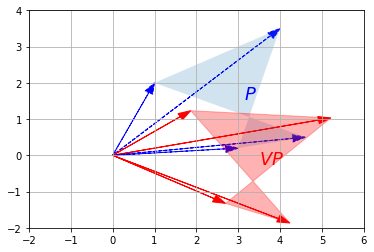

In [6]:
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

我们看到，结果矩阵沿着夹角为30度的斜线旋转了30度。

矩阵V也叫做旋转矩阵。

2.矩阵乘法 - 其它的一些线性转换。

下面我们看看剪切效果（shear mapping）:

In [7]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

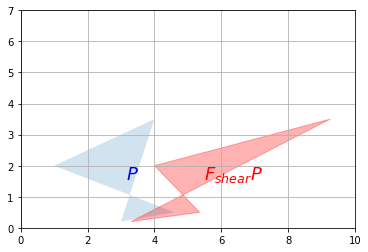

In [8]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{shear} P$",
                    axis=[0, 10, 0, 7])
plt.show()

In [9]:
F_shear.dot(P)

array([[3.3 , 9.25, 4.  , 5.35],
       [0.2 , 3.5 , 2.  , 0.5 ]])

我们看到，原来的P图形横坐标都发生了放大效果，但纵坐标都没变。

也可以让P在纵坐标上发生改变，而横坐标不变：

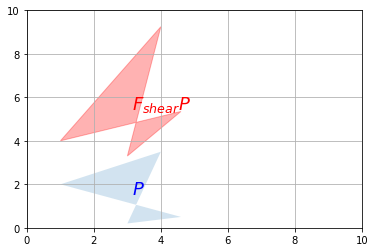

In [10]:
F_shear = np.array([
        [1, 0],
        [1, 1.5]
    ])
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{shear} P$",
                    axis=[0, 10, 0, 10])
plt.show()

下面我们看看对单位方矩阵（unit square）的影响：

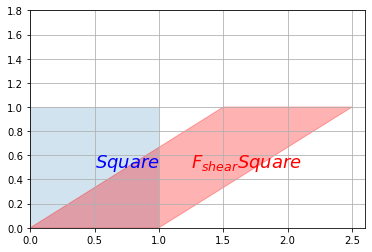

In [11]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])

Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
plot_transformation(Square, F_shear.dot(Square), "$Square$", "$F_{shear} Square$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

接下来看看挤压映射（squeeze mapping）：

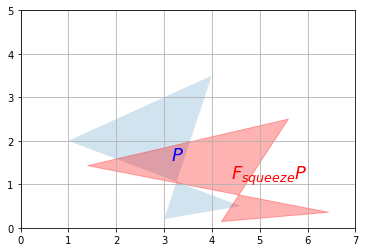

In [12]:
F_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])
plot_transformation(P, F_squeeze.dot(P), "$P$", "$F_{squeeze} P$",
                    axis=[0, 7, 0, 5])
plt.show()

我们看到，结果矩阵的横坐标都增加了0.4倍，纵坐标都减少了1/1.4倍。

在单位矩阵上（unit square）的效果：

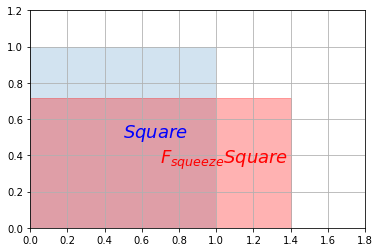

In [13]:
plot_transformation(Square, F_squeeze.dot(Square), "$Square$", "$F_{squeeze} Square$",
                    axis=[0, 1.8, 0, 1.2])
plt.show()

最后看看再横坐标轴上的效果：

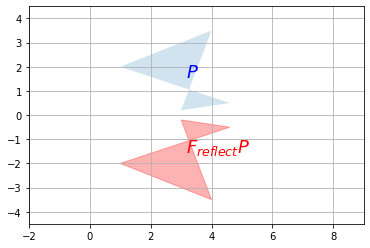

In [14]:
F_reflect = np.array([
        [1, 0],
        [0, -1]
    ])
plot_transformation(P, F_reflect.dot(P), "$P$", "$F_{reflect} P$",
                    axis=[-2, 9, -4.5, 4.5])
plt.show()

结果矩阵的X轴坐标不变，但纵坐标都变成了负值。

3.矩阵的逆。

矩阵能够执行上述线性变换，如果变换后再变换回原来的矩阵，那么这个矩阵就是可逆的，记做$F^{-1}$。

例如下面的例子：

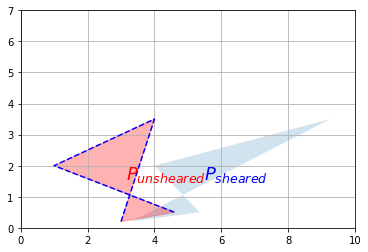

In [15]:
F_inv_shear = np.array([
    [1, -1.5],
    [0, 1]
])
P_sheared = F_shear.dot(P)
P_unsheared = F_inv_shear.dot(P_sheared)
plot_transformation(P_sheared, P_unsheared, "$P_{sheared}$", "$P_{unsheared}$",
                    axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], "b--")
plt.show()

变换后的矩阵经过点积运算后，又变回了原来的矩阵。

numpy可以计算矩阵的逆：

In [16]:
F_inv_shear = np.linalg.inv(F_shear)
F_inv_shear

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

只有方形矩阵才是可逆的，但不是所有的方形矩阵都可逆：

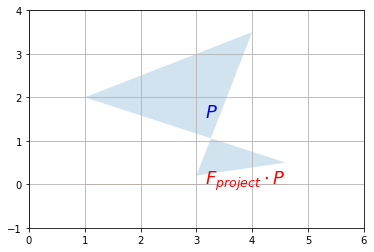

In [17]:
F_project = np.array([
        [1, 0],
        [0, 0]
    ])
plot_transformation(P, F_project.dot(P), "$P$", "$F_{project} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

In [18]:
F_project.dot(P)

array([[3. , 4. , 1. , 4.6],
       [0. , 0. , 0. , 0. ]])

我们看到，点积运算后的矩阵信息丢失严重；可以用inv计算矩阵是否可逆：

In [19]:
try:
    np.linalg.inv(F_project)
except np.linalg.LinAlgError as e:
    print("LinAlgError:", e)

LinAlgError: Singular matrix


不可逆的矩阵叫单一矩阵（Singular matrix）。

矩阵点积它的逆矩阵是一个同一性矩阵：

$M \cdot M^{-1} = M^{-1} \cdot M = I$

如：

In [20]:
F_shear.dot(np.linalg.inv(F_shear))

array([[1., 0.],
       [0., 1.]])

以下公式成立：

$ (\lambda \times M)^{-1} = \frac{1}{\lambda} \times M^{-1}$

这个公式我暂时还没理解。

一个矩阵和它的逆矩阵相等，我们叫做involution，例如：

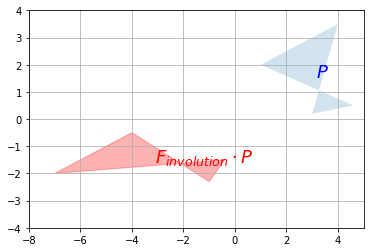

In [21]:
F_involution  = np.array([
        [0, -2],
        [-1/2, 0]
    ])
plot_transformation(P, F_involution.dot(P), "$P$", "$F_{involution} \cdot P$",
                    axis=[-8, 5, -4, 4])
plt.show()

In [22]:
np.linalg.inv(F_involution)

array([[-0. , -2. ],
       [-0.5, -0. ]])

In [23]:
F_involution.dot(F_involution.dot(P))

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

In [24]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

这证明F_involution是可逆矩阵。

如果矩阵的逆和它的转置矩阵相等，那么该矩阵叫正交矩阵：$H^{-1} = H^T$。

因而有：

$H \cdot H^T = H^T \cdot H = I$

对于通常的可逆矩阵有：$M \cdot M^{-1} = M^{-1} \cdot M = I$

即矩阵和它的逆矩阵的点积是同一性矩阵（对角线全1）。

4.方形矩阵的行列式。

方形矩阵的行列式记做：$\det(M)$ or $\det M$ or $|M|$

行列式计算方法：

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$

* $M^{(i,j)}$矩阵去除了第$i$行和第$j$列

例如：

$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

它的行列式为：$|M| = 1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
     - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
     + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$

$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$

可以使用numpy的det函数计算行列式：

In [25]:
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
np.linalg.det(M)

27.0

行列式用来判断矩阵是否可逆，如果行列式为0，那么矩阵不可逆；不为0，则矩阵可逆。

In [27]:
np.linalg.det(F_project)

0.0

正如上面所述，F_project是不可逆矩阵。

我们看一个单一矩阵的例子：

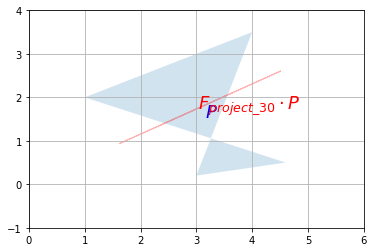

In [28]:
angle30 = 30 * np.pi / 180
F_project_30 = np.array([
               [np.cos(angle30)**2, np.sin(2*angle30)/2],
               [np.sin(2*angle30)/2, np.sin(angle30)**2]
         ])
plot_transformation(P, F_project_30.dot(P), "$P$", "$F_{project\_30} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

In [29]:
F_project_30.dot(P)

array([[2.33660254, 4.51554446, 1.6160254 , 3.66650635],
       [1.34903811, 2.60705081, 0.9330127 , 2.11685843]])

我们看到，点积后矩阵变成了一条直线，信息损失严重。

计算F_project_30的逆矩阵：

In [30]:
np.linalg.inv(F_project_30)

array([[ 1.20095990e+16, -2.08012357e+16],
       [-2.08012357e+16,  3.60287970e+16]])

数值非常大，是浮点错误；再计算它的行列式：

In [31]:
np.linalg.det(F_project_30)

2.0816681711721642e-17

行列式非常接近0，说明它是不可逆矩阵。

In [32]:
np.linalg.det(F_shear)

1.0

F_shear是可逆矩阵。

矩阵的行列式能够用来判断矩阵线性转换后的效果；比如F_project和F_project_30，他们转换后
的矩阵面积变为0，这也是为什么他们的行列式是0。

下面看看缩放矩阵的行列式：

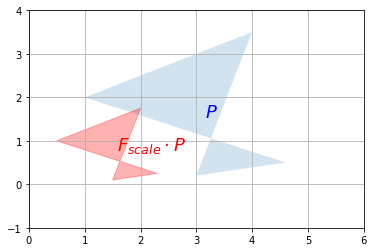

In [33]:
F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
plot_transformation(P, F_scale.dot(P), "$P$", "$F_{scale} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

In [34]:
np.linalg.det(F_scale)

0.25

In [35]:
np.linalg.inv(F_scale)

array([[2., 0.],
       [0., 2.]])

以上例子中，我们把P矩阵的横坐标和纵坐标都缩小了一半，点积后的矩阵面积缩小了四分之一，
而F_scale的行列式也是0.25，完全正确。

行列式也可以为负值，比如F_reflect的效果，它将原来的矩阵按照横轴对称映射，
所以他的行列式为：

In [36]:
np.linalg.det(F_reflect)

-1.0

5.组合线性转换。

例如下面的操作：

In [38]:
P_squeezed_then_sheared = F_shear.dot(F_squeeze.dot(P))
P_squeezed_then_sheared

array([[4.41428571, 9.35      , 3.54285714, 6.97571429],
       [0.14285714, 2.5       , 1.42857143, 0.35714286]])

因为点积运算是相关联的，所以也可以这样：

In [40]:
P_squeezed_then_sheared = (F_shear.dot(F_squeeze)).dot(P)
P_squeezed_then_sheared

array([[4.41428571, 9.35      , 3.54285714, 6.97571429],
       [0.14285714, 2.5       , 1.42857143, 0.35714286]])

点积的逆有如下公式：

$(Q \cdot R)^{-1} = R^{-1} \cdot Q^{-1}$

例如：

In [41]:
np.linalg.inv(F_shear.dot(F_squeeze)) == np.linalg.inv(F_squeeze).dot(np.linalg.inv(F_shear))

array([[ True,  True],
       [ True,  True]])

一个矩阵可以拆分为几个矩阵的点积：

* 一个旋转矩阵 $U$ ($m \times m$ 的正交矩阵)
* 一个缩放，投影矩阵 $\Sigma$ ($m \times n$ 对角矩阵)
* 和另一个旋转矩阵 $V^T$ ($n \times n$ 正交矩阵)

$M = U \cdot \Sigma \cdot V^{T}$

例如;

In [44]:
U, S_diag, V_T = np.linalg.svd(F_shear) # note: in python 3 you can rename S_diag to Σ_diag
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [47]:
S_diag

array([2. , 0.5])

In [46]:
np.diag(S_diag)

array([[2. , 0. ],
       [0. , 0.5]])

In [48]:
V_T

array([[ 0.4472136 ,  0.89442719],
       [-0.89442719,  0.4472136 ]])

In [50]:
U.dot(np.diag(S_diag)).dot(V_T)

array([[1. , 1.5],
       [0. , 1. ]])

In [51]:
F_shear

array([[1. , 1.5],
       [0. , 1. ]])

点积组合后，和F_shear的值是一样的。

我们反向执行点积操作，先执行V_T旋转操作：

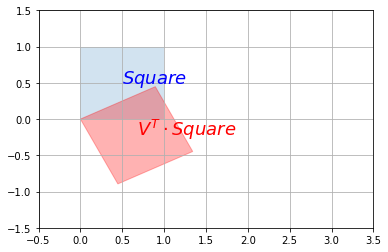

In [52]:
plot_transformation(Square, V_T.dot(Square), "$Square$", "$V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

然后在横坐标和纵坐标上缩放：

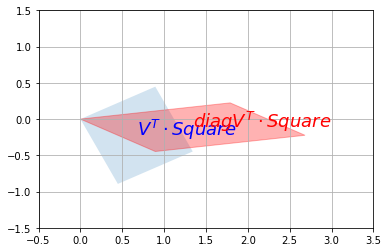

In [53]:
plot_transformation(V_T.dot(Square), np.diag(S_diag).dot(V_T.dot(Square)), "$V^T \cdot Square$", "$diag V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

最后进行旋转：

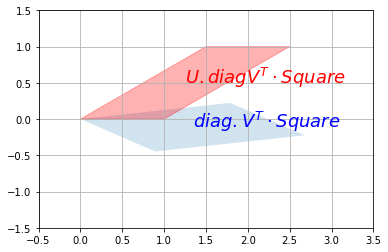

In [54]:
plot_transformation(np.diag(S_diag).dot(V_T.dot(Square)), U.dot(np.diag(S_diag).dot(V_T.dot(Square))), "$diag.V^T \cdot Square$", "$U.diag V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

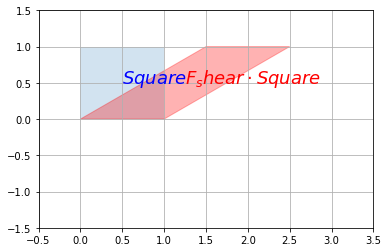

In [57]:
plot_transformation(Square, F_shear.dot(Square), "$Square$", "$F_shear \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

我们看到，和直接执行F_shear转换，效果是一样的。

6.特征向量和特征值。

有如下定义：$M \cdot v = \lambda \times v$

$\lambda$叫做特征向量$v$的特征值。

在shear mapping中，横坐标没有改变，那么横坐标就是M的特征向量；纵坐标被拉伸，那么纵坐标
就不是特征向量。

在squeeze mapping中，横坐标和纵坐标方向都没有变，虽然长度有变化，所以横坐标和纵坐标
都是M的特征向量。

In [ ]:
可以用eig查看特征向量和特征值；我们看看F_squeeze的特征向量和特征值。

In [62]:
F_squeeze

array([[1.4       , 0.        ],
       [0.        , 0.71428571]])

In [59]:
eigenvalues, eigenvectors = np.linalg.eig(F_squeeze)
eigenvalues # [λ0, λ1, …]

array([1.4       , 0.71428571])

In [61]:
eigenvectors

array([[1., 0.],
       [0., 1.]])

再看看F_shear的值：

In [63]:
F_shear

array([[1. , 1.5],
       [0. , 1. ]])

In [65]:
eigenvalues2, eigenvectors2 = np.linalg.eig(F_shear)
eigenvalues2 # [λ0, λ1, …]

array([1., 1.])

In [66]:
eigenvectors2

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.48029737e-16]])

1.48029737e-16接近0，这是浮点错误。